In [1]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'synthetic_power_load_data_realistic.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the data
data_info = data.info()
data_head = data.head()
data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          26304 non-null  object 
 1   Load (kW)         26304 non-null  float64
 2   Temperature (°C)  26304 non-null  float64
 3   Humidity (%)      26304 non-null  float64
 4   Wind Speed (m/s)  26304 non-null  float64
 5   Day of Week       26304 non-null  int64  
 6   Hour              26304 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ MB


(None,
               Datetime  Load (kW)  Temperature (°C)  Humidity (%)  \
 0  2022-01-01 00:00:00  57.827838          9.835973     44.926342   
 1  2022-01-01 01:00:00  55.947041         19.660266     48.950093   
 2  2022-01-01 02:00:00  61.082710         17.135231     66.311110   
 3  2022-01-01 03:00:00  66.494950         15.005380     49.209058   
 4  2022-01-01 04:00:00  58.503627         16.012039     49.907486   
 
    Wind Speed (m/s)  Day of Week  Hour  
 0          5.882430            5     0  
 1          1.695450            5     1  
 2          0.745296            5     2  
 3          0.209786            5     3  
 4          4.130136            5     4  )

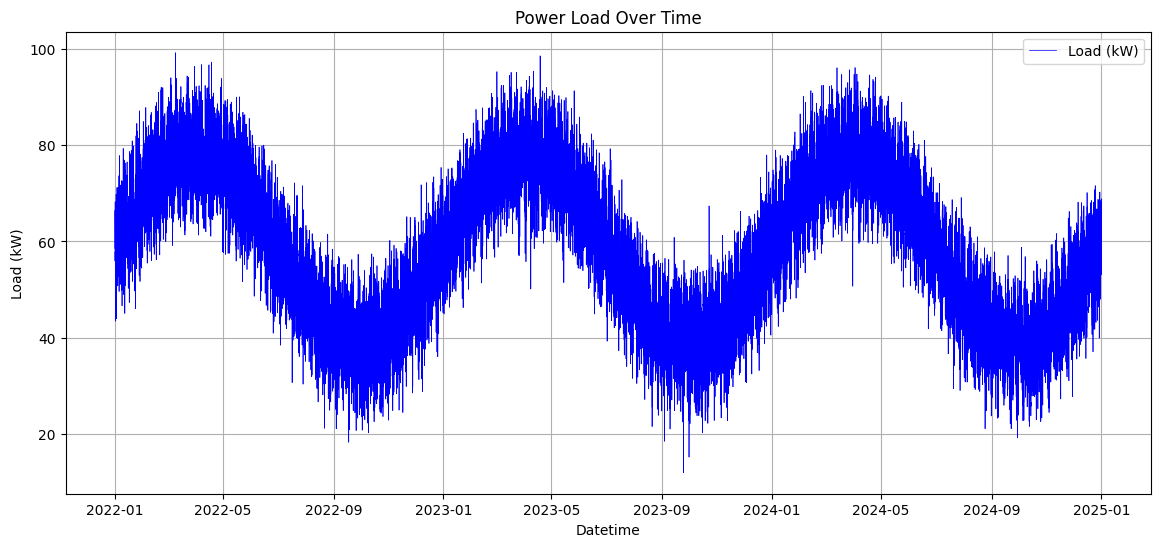

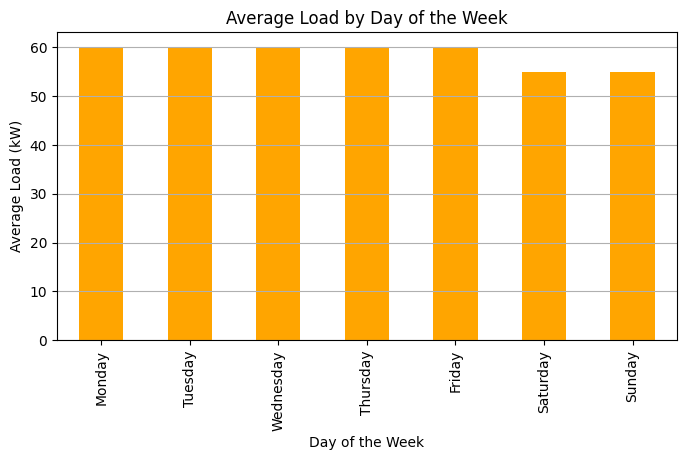

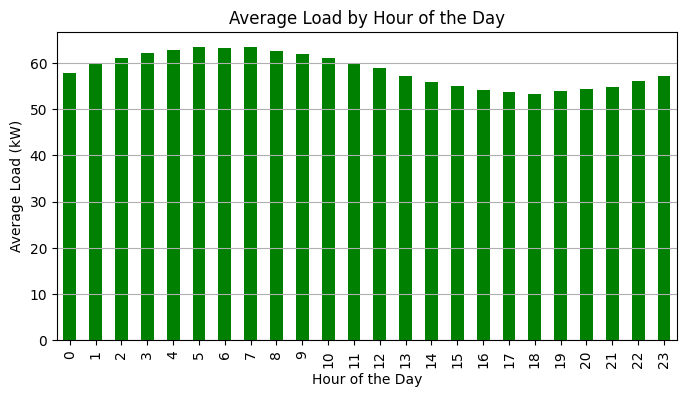

In [3]:
import matplotlib.pyplot as plt

# Ensure Datetime is properly converted
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

# Check for any rows where conversion failed
if data['Datetime'].isnull().any():
    print("Warning: Some datetime conversions failed. Dropping invalid rows.")
    data = data.dropna(subset=['Datetime'])

# Extract the day name after ensuring correct type
data['Day'] = data['Datetime'].dt.day_name()

# Step 2: Exploratory Data Analysis (EDA)

# Plot Load (kW) over time
plt.figure(figsize=(14, 6))
plt.plot(data['Datetime'], data['Load (kW)'], label='Load (kW)', color='blue', linewidth=0.5)
plt.title('Power Load Over Time')
plt.xlabel('Datetime')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid()
plt.show()

# Analyze weekly load patterns
data['Day'] = data['Datetime'].dt.day_name()
weekly_load = data.groupby('Day')['Load (kW)'].mean()

# Plot average load by day of the week
plt.figure(figsize=(8, 4))
weekly_load = weekly_load.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly_load.plot(kind='bar', color='orange')
plt.title('Average Load by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Load (kW)')
plt.grid(axis='y')
plt.show()

# Hourly load patterns
hourly_load = data.groupby('Hour')['Load (kW)'].mean()

# Plot average load by hour of the day
plt.figure(figsize=(8, 4))
hourly_load.plot(kind='bar', color='green')
plt.title('Average Load by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (kW)')
plt.grid(axis='y')
plt.show()


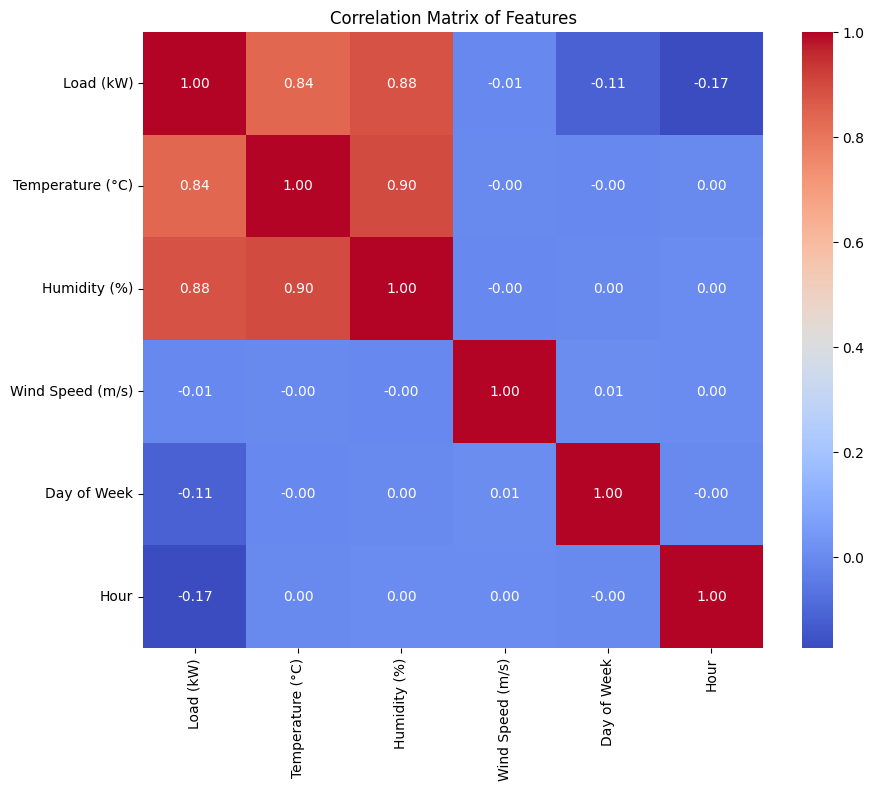

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data[features_to_scale].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


Hour
0     0.524984
1     0.548572
2     0.563727
3     0.575798
4     0.584076
5     0.591714
6     0.588992
7     0.590182
8     0.582061
9     0.574095
10    0.562405
11    0.548313
12    0.538489
13    0.519575
14    0.504886
15    0.493014
16    0.485067
17    0.478880
18    0.474619
19    0.481142
20    0.486237
21    0.491326
22    0.507254
23    0.519250
Name: Load (kW), dtype: float64


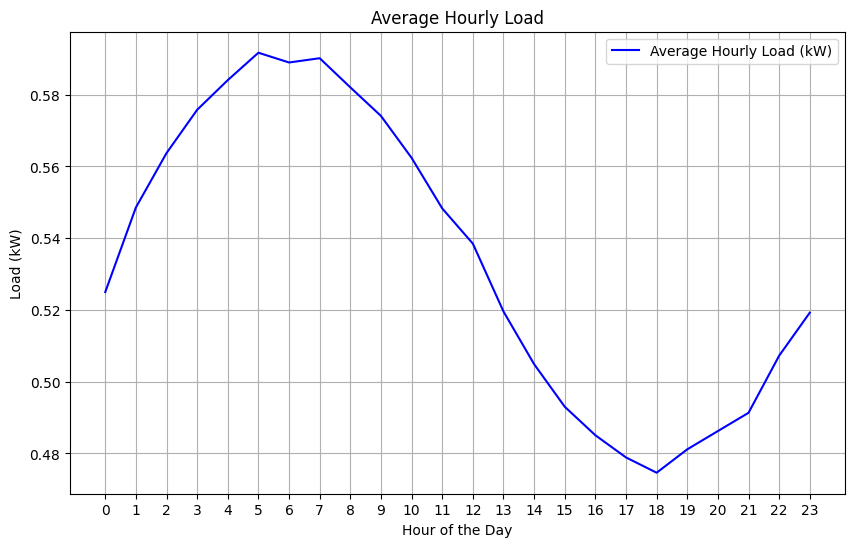

In [29]:
# Extract the hour of the day from the 'Datetime' column
data['Hour'] = data['Datetime'].dt.hour

# Group by the corrected Hour column and calculate the average load
hourly_load = data.groupby('Hour')['Load (kW)'].mean()

# Verify the result of hourly grouping
print(hourly_load)

# Plot hourly load patterns
plt.figure(figsize=(10, 6))
plt.plot(hourly_load, label='Average Hourly Load (kW)', color='blue')
plt.title('Average Hourly Load')
plt.xlabel('Hour of the Day')
plt.ylabel('Load (kW)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()


Day of Week
0    0.550973
1    0.549199
2    0.551719
3    0.548331
4    0.550804
5    0.492893
6    0.493741
Name: Load (kW), dtype: float64


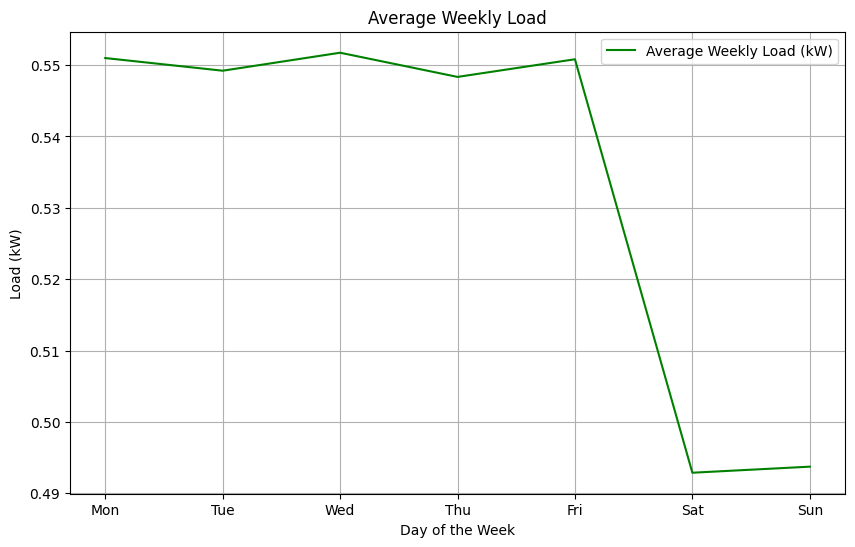

In [30]:
# Extract the day of the week from the 'Datetime' column
data['Day of Week'] = data['Datetime'].dt.dayofweek  # Monday = 0, Sunday = 6

# Group by the 'Day of Week' column and calculate the average load
weekly_load = data.groupby('Day of Week')['Load (kW)'].mean()

# Verify the result of weekly grouping
print(weekly_load)

# Plot weekly load patterns
plt.figure(figsize=(10, 6))
plt.plot(weekly_load, label='Average Weekly Load (kW)', color='green')
plt.title('Average Weekly Load')
plt.xlabel('Day of the Week')
plt.ylabel('Load (kW)')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.legend()
plt.show()


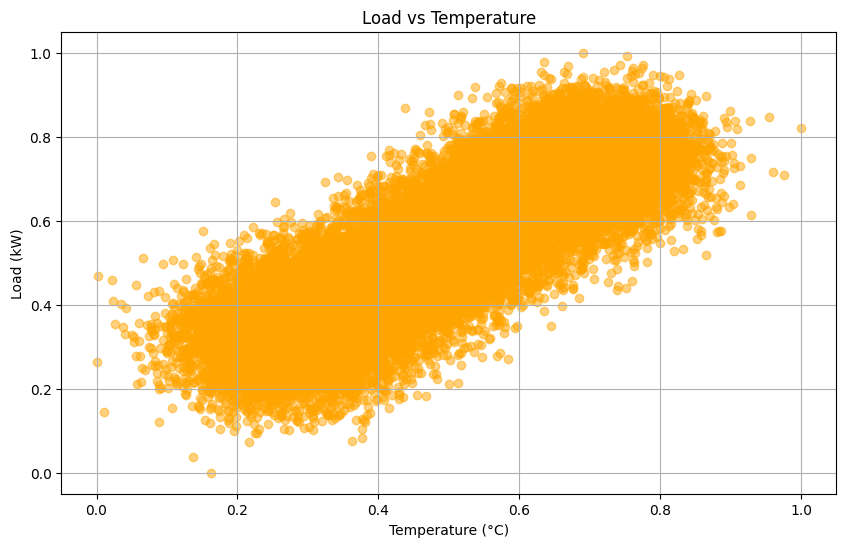

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature (°C)'], data['Load (kW)'], alpha=0.5, color='orange')
plt.title('Load vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()


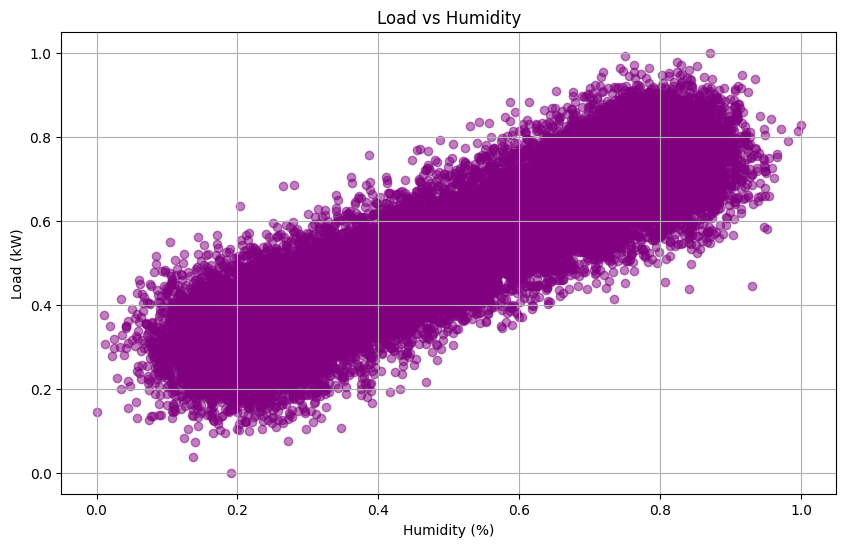

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Humidity (%)'], data['Load (kW)'], alpha=0.5, color='purple')
plt.title('Load vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()


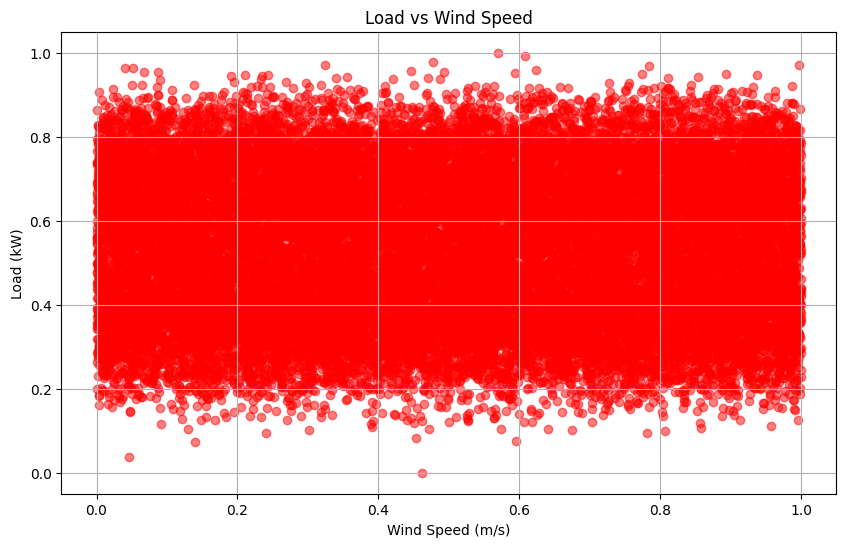

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Wind Speed (m/s)'], data['Load (kW)'], alpha=0.5, color='red')
plt.title('Load vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()


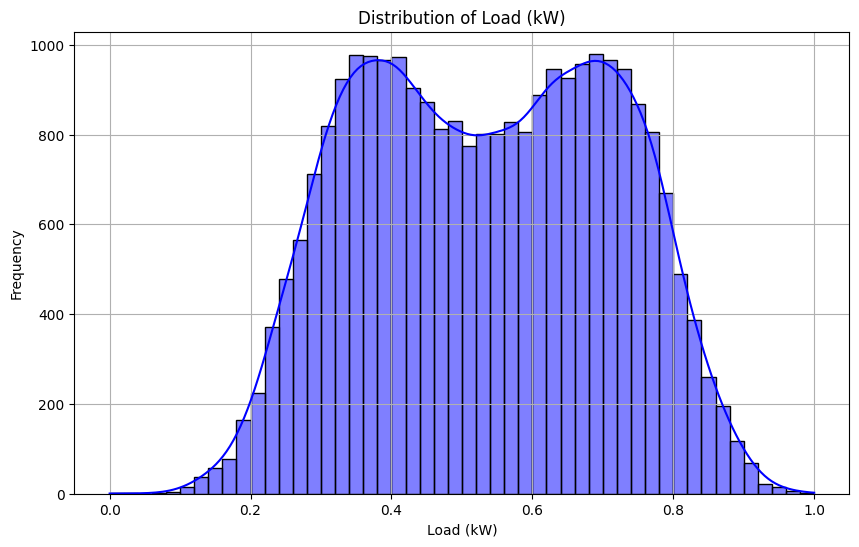

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Load (kW)'], bins=50, kde=True, color='blue')
plt.title('Distribution of Load (kW)')
plt.xlabel('Load (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


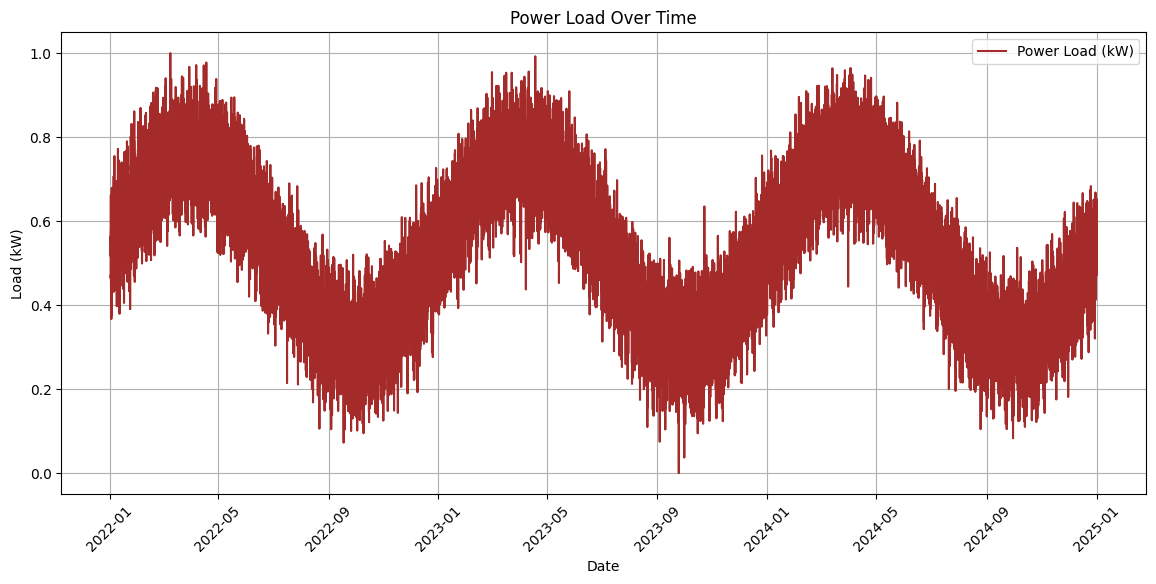

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(data['Datetime'], data['Load (kW)'], label='Power Load (kW)', color='brown')
plt.title('Power Load Over Time')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_16832\2804722039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Load (kW)', data=data, palette='Set2')


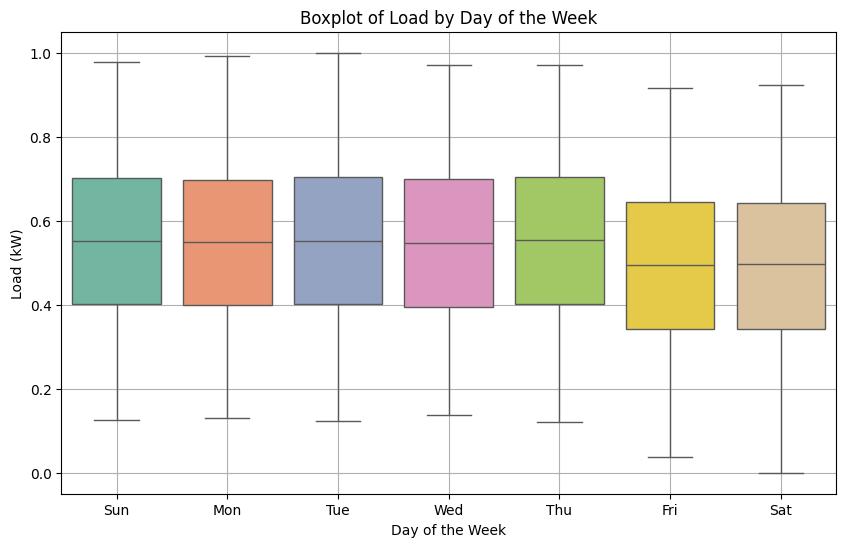

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Load (kW)', data=data, palette='Set2')
plt.title('Boxplot of Load by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Load (kW)')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)
plt.show()


C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_16832\1779496652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hour', y='Load (kW)', data=data, palette='coolwarm')


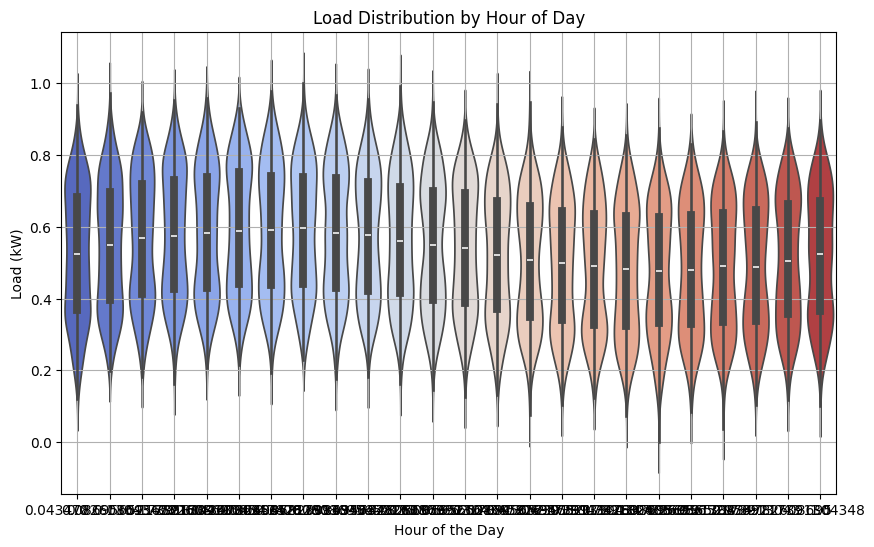

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hour', y='Load (kW)', data=data, palette='coolwarm')
plt.title('Load Distribution by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()


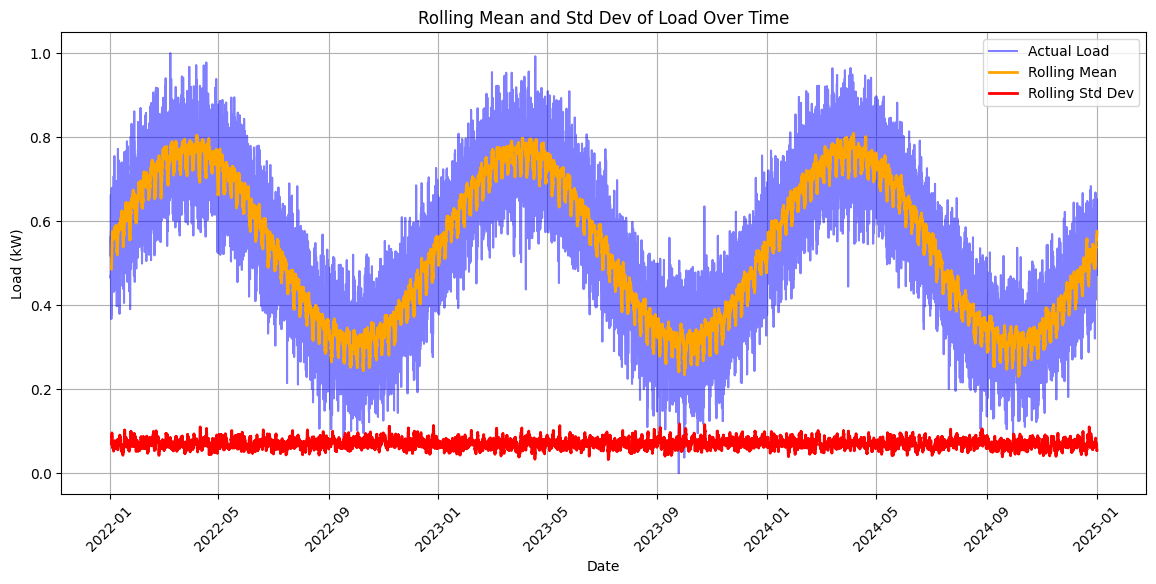

In [24]:
# Calculate rolling mean and std
data['Rolling_Mean'] = data['Load (kW)'].rolling(window=24).mean()
data['Rolling_Std'] = data['Load (kW)'].rolling(window=24).std()

# Plot the rolling mean and std over time
plt.figure(figsize=(14, 6))
plt.plot(data['Datetime'], data['Load (kW)'], label='Actual Load', color='blue', alpha=0.5)
plt.plot(data['Datetime'], data['Rolling_Mean'], label='Rolling Mean', color='orange', linewidth=2)
plt.plot(data['Datetime'], data['Rolling_Std'], label='Rolling Std Dev', color='red', linewidth=2)
plt.title('Rolling Mean and Std Dev of Load Over Time')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


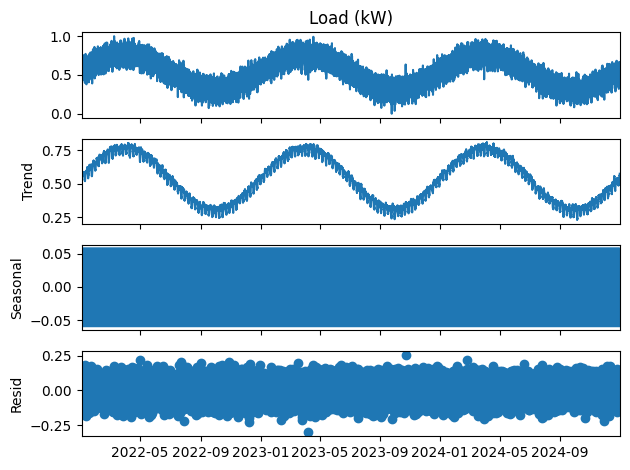

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(data.set_index('Datetime')['Load (kW)'], model='additive', period=24)
fig = decomposition.plot()
plt.show()


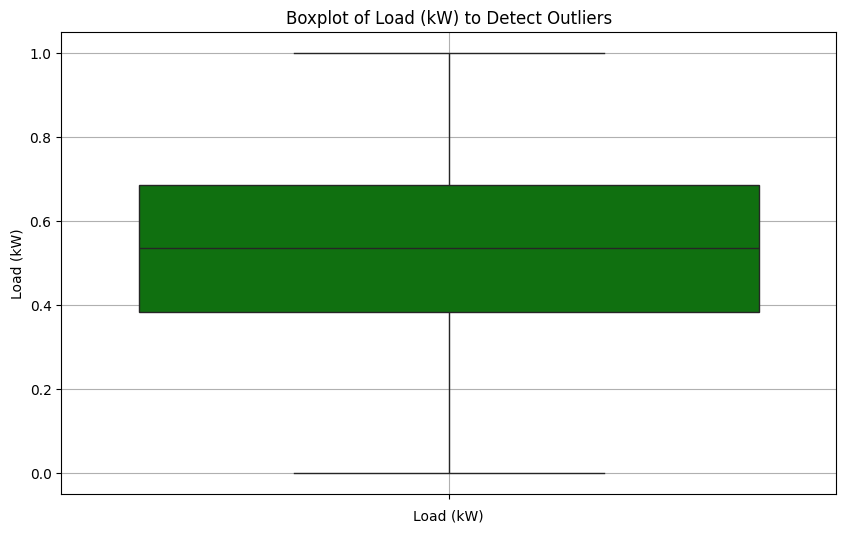

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Load (kW)'], color='green')
plt.title('Boxplot of Load (kW) to Detect Outliers')
plt.xlabel('Load (kW)')
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv("synthetic_power_load_data_realistic.csv")

# Convert the Datetime column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Normalize the relevant features
scaler = MinMaxScaler()
features_to_scale = ['Load (kW)', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Day of Week', 'Hour']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Create lag features for day-ahead forecasting (24-hour lag)
data['Lag_24'] = data['Load (kW)'].shift(24)

# Drop rows with NaN values caused by lagging
data = data.dropna()

# Select features and target
features = ['Lag_24', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Day of Week', 'Hour']
target = 'Load (kW)'
X = data[features]
y = data[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Print shapes to confirm the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (21024, 6)
Testing data shape: (5256, 6)


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test_lstm, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


Epoch 1/20


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0608 - mae: 0.1615 - val_loss: 0.0046 - val_mae: 0.0543
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0061 - mae: 0.0623 - val_loss: 0.0044 - val_mae: 0.0531
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0054 - mae: 0.0586 - val_loss: 0.0045 - val_mae: 0.0536
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0053 - mae: 0.0579 - val_loss: 0.0044 - val_mae: 0.0534
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0052 - mae: 0.0574 - val_loss: 0.0044 - val_mae: 0.0532
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0052 - mae: 0.0571 - val_loss: 0.0043 - val_mae: 0.0528
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0050 - mae: 0.0563 - val_loss: 0.0044 - val_mae: 0.0535
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0051 - mae: 0.0567 - val_loss: 0.0047 - val_mae: 0.0548
Epoch 9/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0049 

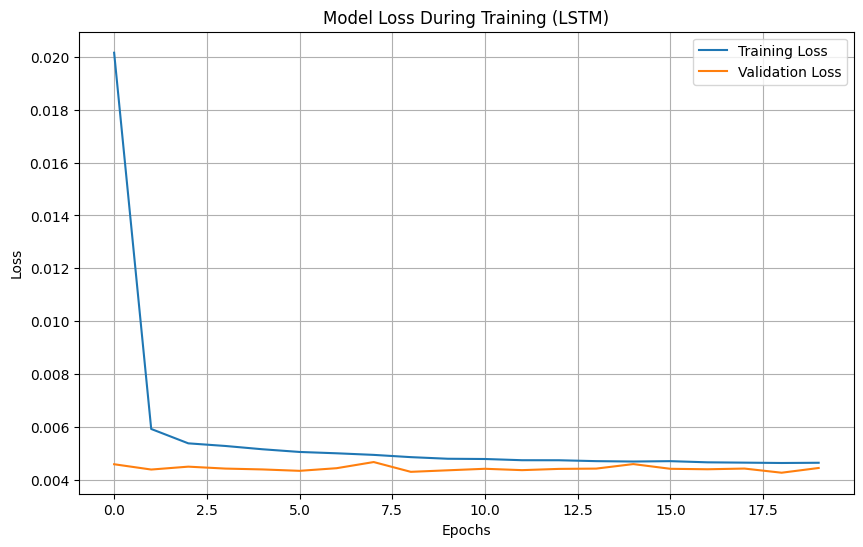

In [33]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


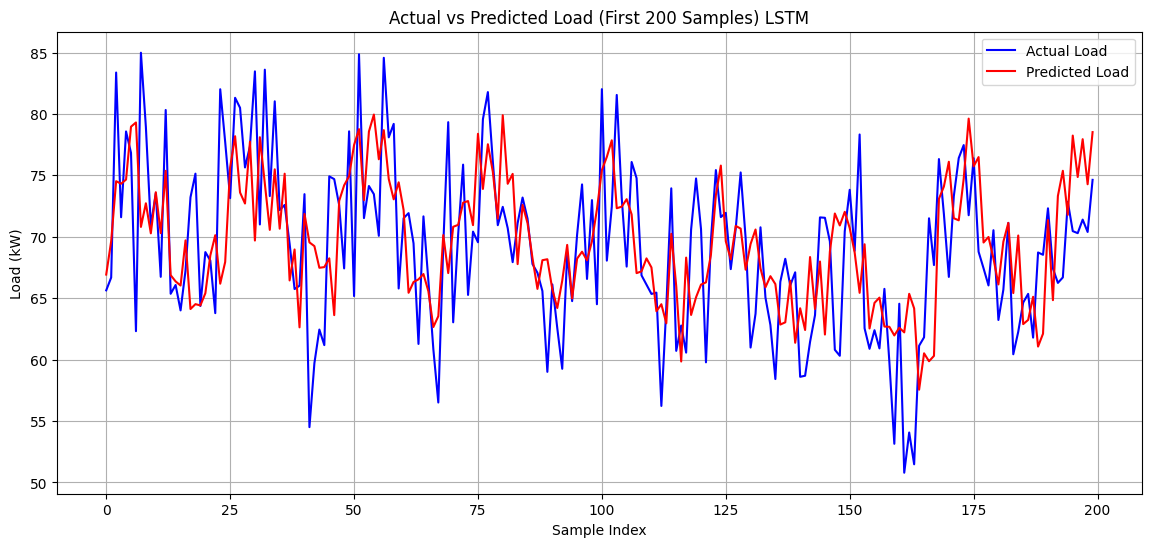

In [32]:
# Extract the scaling parameters for 'Load (kW)'
load_min = scaler.data_min_[0]  # Minimum value used for scaling 'Load (kW)'
load_max = scaler.data_max_[0]  # Maximum value used for scaling 'Load (kW)'

# Rescale predictions back to the original scale
y_pred_actual = y_pred.flatten() * (load_max - load_min) + load_min
y_test_actual = y_test.values * (load_max - load_min) + load_min

# Plot actual vs predicted load
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual[:200], label='Actual Load', color='blue')
plt.plot(y_pred_actual[:200], label='Predicted Load', color='red')
plt.title('Actual vs Predicted Load (First 200 Samples) LSTM')
plt.xlabel('Sample Index')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid()
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Reshape input for GRU: (samples, timesteps, features)
X_train_gru = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Build the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the GRU model
gru_history = gru_model.fit(
    X_train_gru, y_train,
    validation_data=(X_test_gru, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the model
gru_loss, gru_mae = gru_model.evaluate(X_test_gru, y_test, verbose=1)
print(f"Test Loss: {gru_loss:.4f}, Test MAE: {gru_mae:.4f}")


Epoch 1/20


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0372 - mae: 0.1276 - val_loss: 0.0052 - val_mae: 0.0581
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0062 - mae: 0.0620 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0055 - mae: 0.0587 - val_loss: 0.0043 - val_mae: 0.0529
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0053 - mae: 0.0579 - val_loss: 0.0044 - val_mae: 0.0530
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0050 - mae: 0.0565 - val_loss: 0.0044 - val_mae: 0.0532
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0049 - mae: 0.0557 - val_loss: 0.0045 - val_mae: 0.0536
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0050 - mae: 0.0558 - val_loss: 0.0044 - val_mae: 0.0530
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0049 - mae: 0.0555 - val_loss: 0.0045 - val_mae: 0.0538
Epoch 9/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0049 

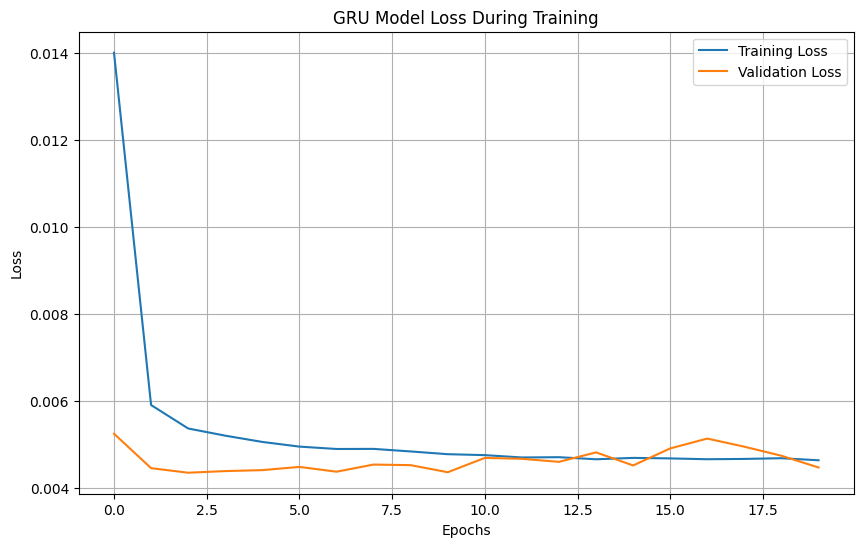

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


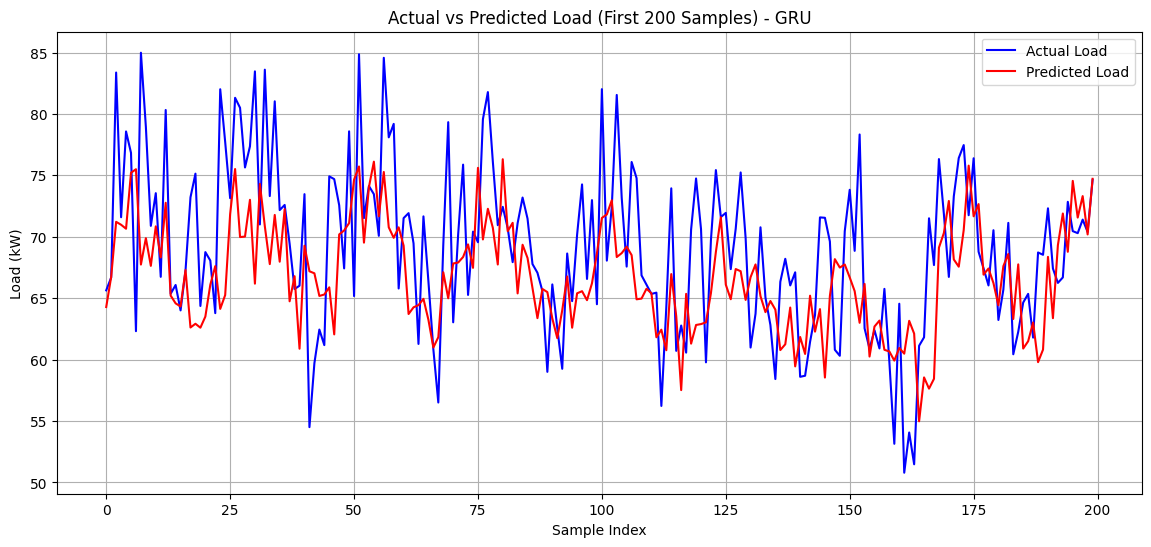

In [12]:
# Generate predictions using the GRU model
gru_y_pred = gru_model.predict(X_test_gru)

# Rescale predictions back to the original scale
gru_y_pred_actual = gru_y_pred.flatten() * (load_max - load_min) + load_min
gru_y_test_actual = y_test.values * (load_max - load_min) + load_min

# Plot actual vs predicted load
plt.figure(figsize=(14, 6))
plt.plot(gru_y_test_actual[:200], label='Actual Load', color='blue')
plt.plot(gru_y_pred_actual[:200], label='Predicted Load', color='red')
plt.title('Actual vs Predicted Load (First 200 Samples) - GRU')
plt.xlabel('Sample Index')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid()
plt.show()


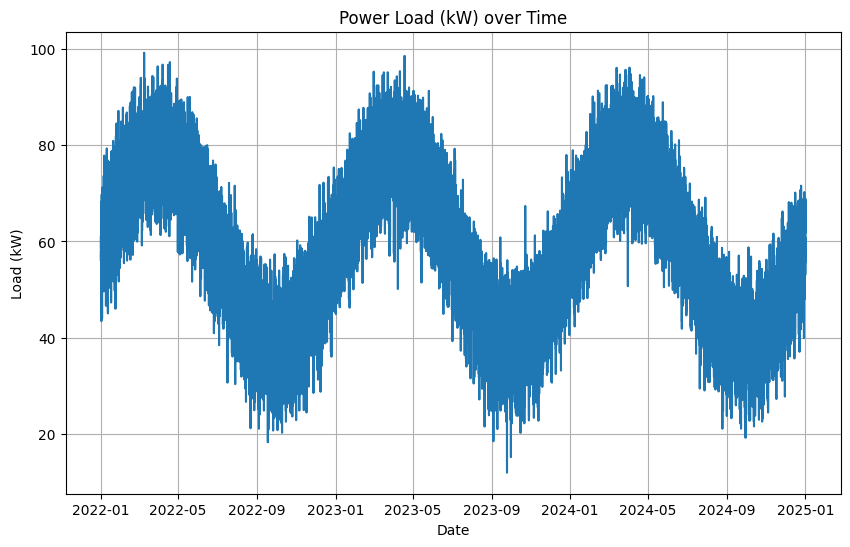

ADF Statistic: -2.654897421805961
p-value: 0.08217339776103488


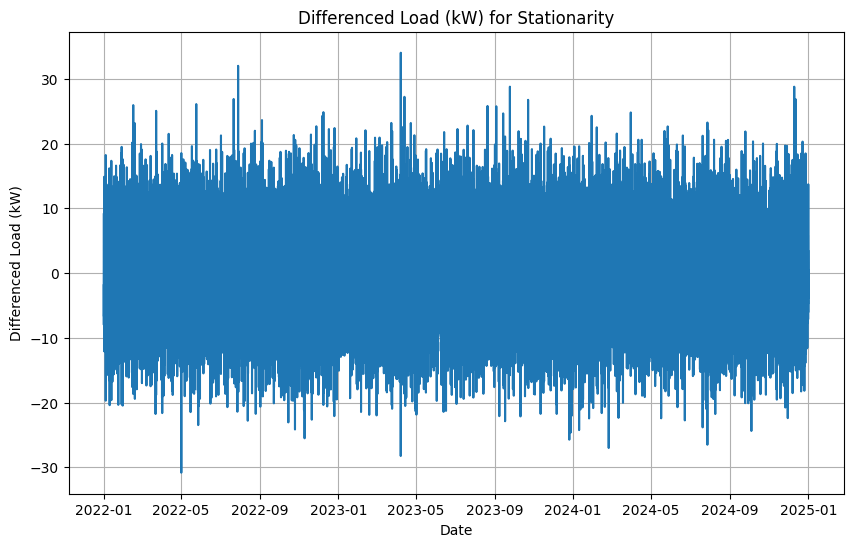

<Figure size 1000x600 with 0 Axes>

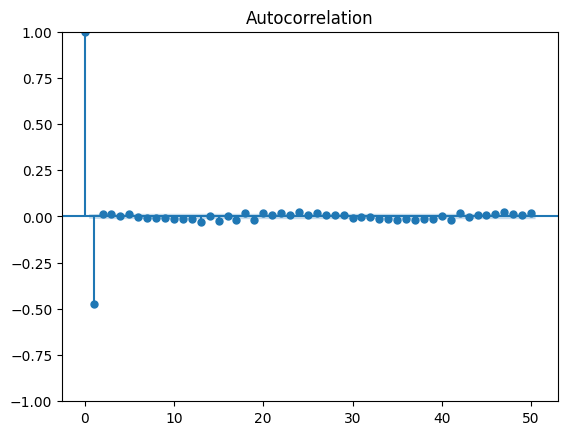

<Figure size 1000x600 with 0 Axes>

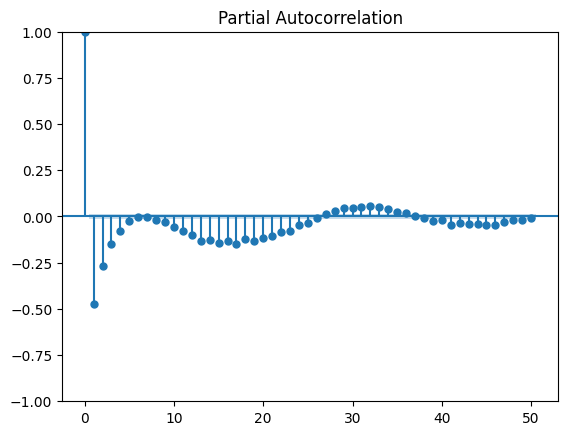

C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Load (kW)   No. Observations:                26304
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -84562.239
Date:                Sat, 18 Jan 2025   AIC                         169130.478
Time:                        18:15:26   BIC                         169155.010
Sample:                    01-01-2022   HQIC                        169138.399
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0595      0.010     -6.107      0.000      -0.079      -0.040
ma.L1         -0.5945      0.008    -73.730      0.000      -0.610      -0.579
sigma2        36.3050      0.318    114.338      0.0

C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_16832\3528065904.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(load_data.index[-1], periods=forecast_steps + 1, freq='H')[1:], forecast, label='Forecasted Load (kW)', color='red')


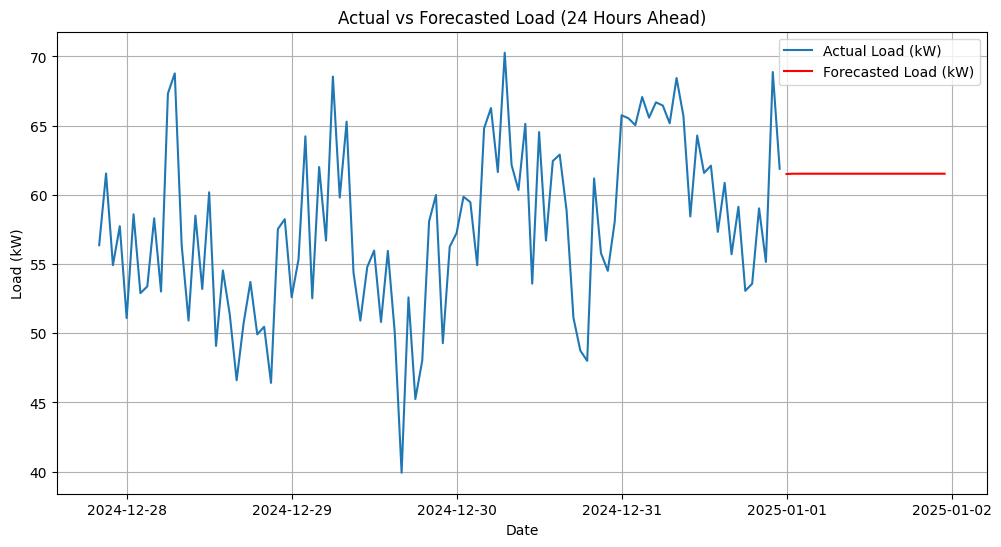

Mean Squared Error (MSE): 22.2403
Mean Absolute Error (MAE): 4.1127


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset (assuming 'synthetic_power_load_data_realistic.csv' is your file)
data = pd.read_csv('synthetic_power_load_data_realistic.csv')

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Set the Datetime column as the index for time series analysis
data.set_index('Datetime', inplace=True)

# Let's focus on the 'Load (kW)' column for ARIMA
load_data = data['Load (kW)']

# Plot the data to check for seasonality or trends
plt.figure(figsize=(10, 6))
plt.plot(load_data)
plt.title('Power Load (kW) over Time')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()

# Check for stationarity using ADF test (Augmented Dickey-Fuller)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(load_data)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# If p-value > 0.05, the series is non-stationary, so we need to difference the data
if adf_test[1] > 0.05:
    load_data_diff = load_data.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(load_data_diff)
    plt.title('Differenced Load (kW) for Stationarity')
    plt.xlabel('Date')
    plt.ylabel('Differenced Load (kW)')
    plt.grid(True)
    plt.show()
else:
    load_data_diff = load_data

# Identify the optimal (p, d, q) parameters using ACF and PACF plots
plt.figure(figsize=(10, 6))
plot_acf(load_data_diff, lags=50)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(load_data_diff, lags=50)
plt.show()

# Fit the ARIMA model with selected p, d, q parameters
# Let's use p=1, d=1, q=1 as an example
model = ARIMA(load_data, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Check the summary of the ARIMA model
print(model_fit.summary())

# Forecast the next 24 hours (1 day ahead)
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values against the actual data
plt.figure(figsize=(12, 6))
plt.plot(load_data.index[-100:], load_data[-100:], label='Actual Load (kW)')
plt.plot(pd.date_range(load_data.index[-1], periods=forecast_steps + 1, freq='H')[1:], forecast, label='Forecasted Load (kW)', color='red')
plt.title('Actual vs Forecasted Load (24 Hours Ahead)')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance on the training data
train_data = load_data[:-forecast_steps]
test_data = load_data[-forecast_steps:]

# Predict on test data
test_forecast = model_fit.forecast(steps=forecast_steps)

# Calculate error metrics
mse = mean_squared_error(test_data, test_forecast)
mae = mean_absolute_error(test_data, test_forecast)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
